In [71]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [72]:
# Getting the Data
data = pd.read_csv("train_new.csv")

In [73]:
# 1460 rows and 81 columns, no null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          91 non-null     object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [74]:
data = data.drop(["Id"],axis=1)

In [75]:
# Visualize the data
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [76]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80,9600,6,8,1976,1976,0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84,14260,8,5,2000,2000,350,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### EDA

In [77]:
#head
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
# dropping ID as it not necessary and OverallQual and OverallCond as they have specific 10 specific types can be treated as categorical value
data_numeric =  data_numeric.drop(["OverallQual","OverallCond"],axis = 1)
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65,8450,2003,2003,196,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80,9600,1976,1976,0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68,11250,2001,2002,162,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60,9550,1915,1970,0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84,14260,2000,2000,350,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [79]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357042,-0.139781,0.027850,0.040581,0.022899,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357042,1.000000,0.306689,0.117555,0.082775,0.179270,0.215760,0.043298,0.122249,0.363366,...,0.077032,0.137435,0.009814,0.062317,0.037683,0.180867,0.001101,0.010172,0.006750,0.334897
LotArea,-0.139781,0.306689,1.000000,0.014228,0.013788,0.103957,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.027850,0.117555,0.014228,1.000000,0.592855,0.314726,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082775,0.013788,0.592855,1.000000,0.179170,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022899,0.179270,0.103957,0.314726,0.179170,1.000000,0.263569,-0.072296,0.114182,0.362438,...,0.159355,0.124950,-0.109850,0.018797,0.061459,0.011724,-0.029813,-0.005945,-0.008185,0.475227
BsmtFinSF1,-0.069836,0.215760,0.214103,0.249503,0.128451,0.263569,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043298,0.111170,-0.049107,-0.067759,-0.072296,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,0.122249,-0.002618,0.149040,0.181133,0.114182,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.363366,0.260833,0.391452,0.291066,0.362438,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


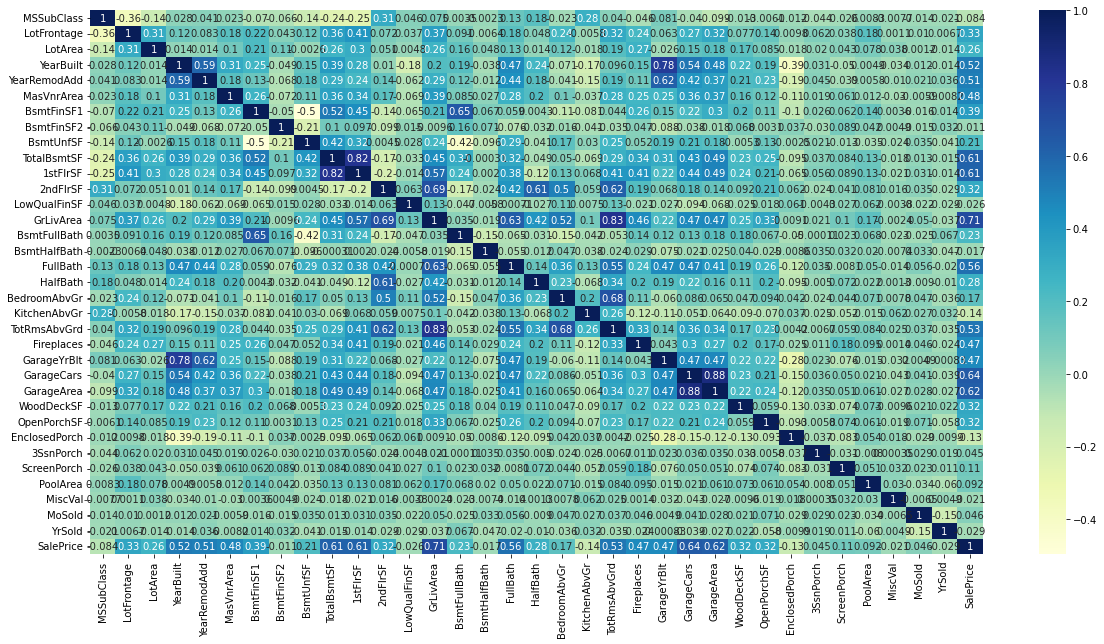

In [80]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


In [81]:
data_numeric.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.041096,10516.828082,1971.267808,1984.865753,103.681507,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024031,9981.264932,30.202904,20.645407,180.569120,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Visualize the Data

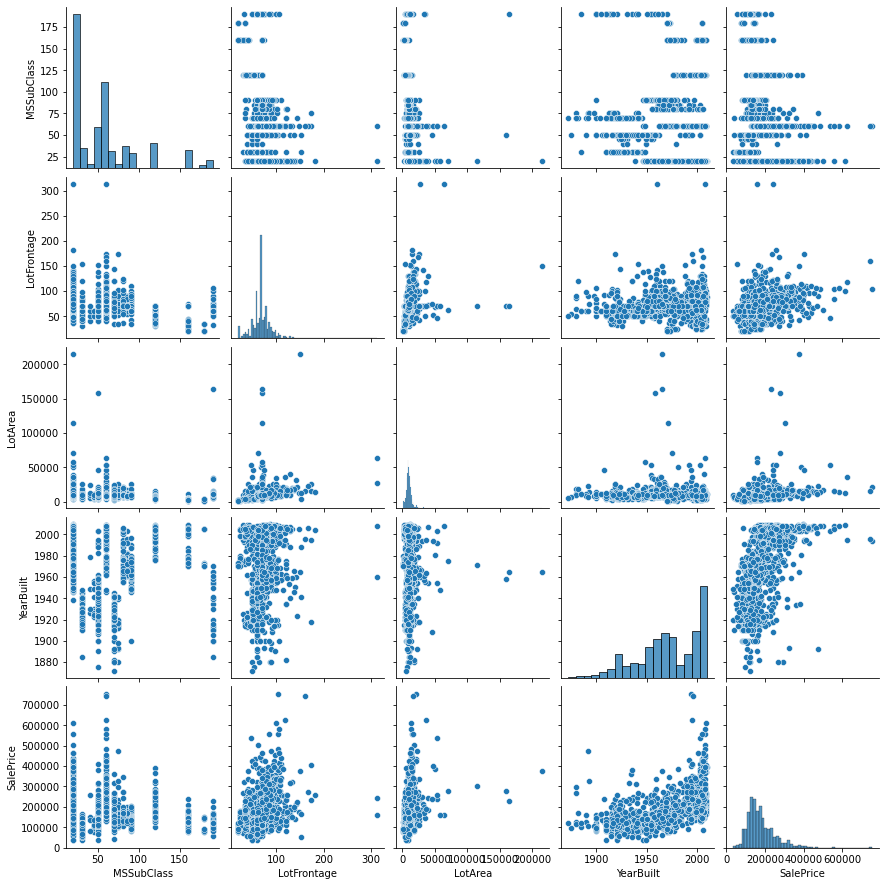

In [82]:
# Visualize the numerical varaibles
num_var = ["MSSubClass","LotFrontage","LotArea","YearBuilt","SalePrice"]
sns.pairplot(data_numeric[num_var])
plt.show()

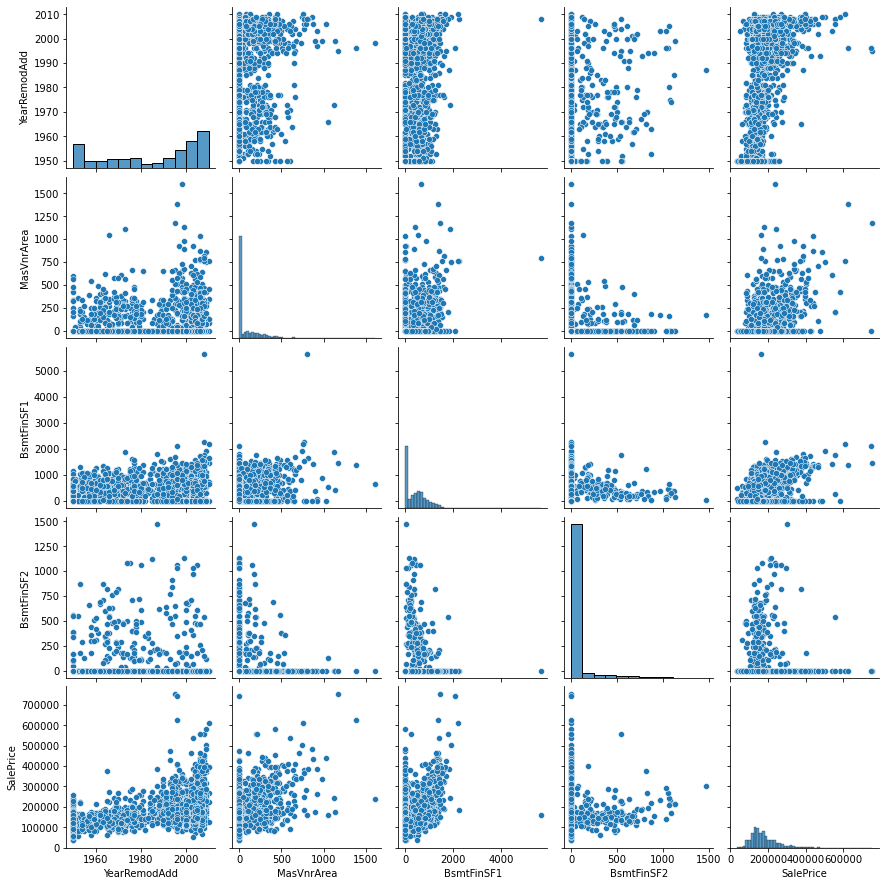

In [83]:
# Visualize the numerical varaibles
num_var = ["YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","SalePrice"]
sns.pairplot(data_numeric[num_var])
plt.show()

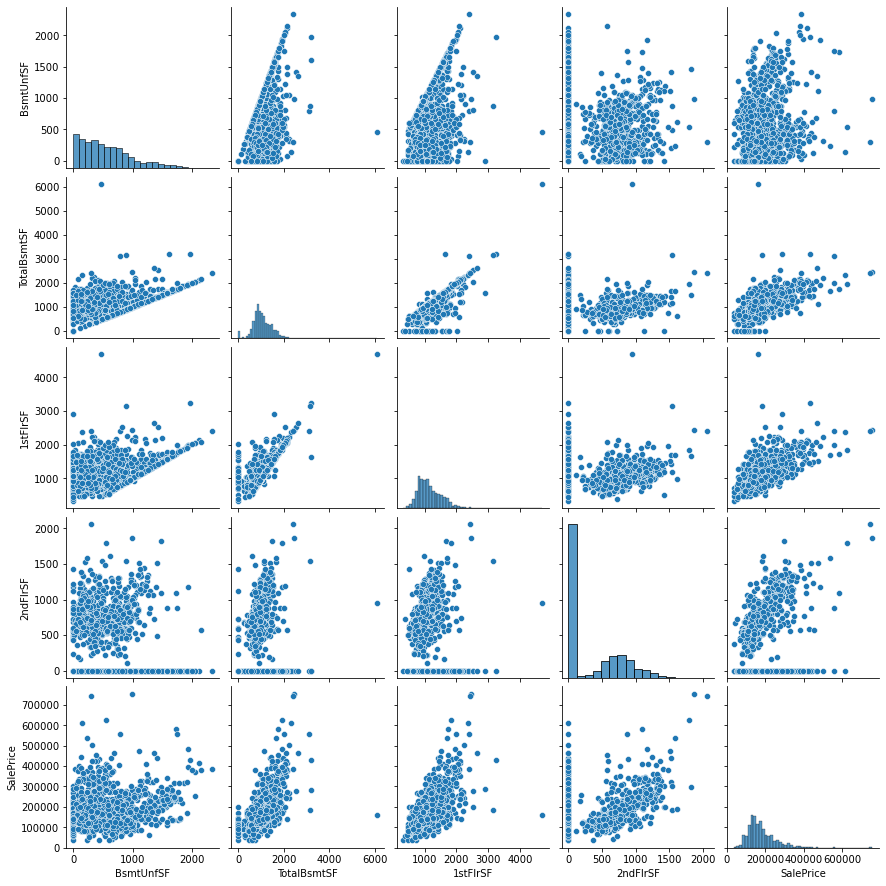

In [84]:
# Visualize the numerical varaibles
num_var = ["BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","SalePrice"]
sns.pairplot(data_numeric[num_var])
plt.show()

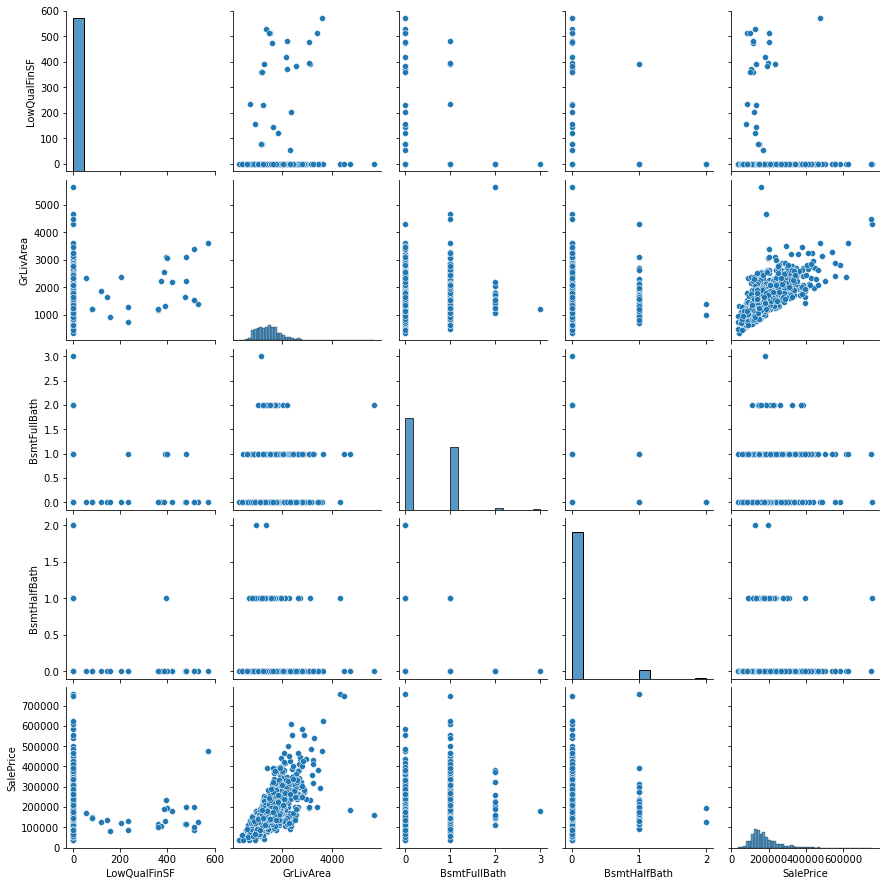

In [85]:
# Visualize the numerical varaibles
num_var = ["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","SalePrice"]
sns.pairplot(data_numeric[num_var])
plt.show()

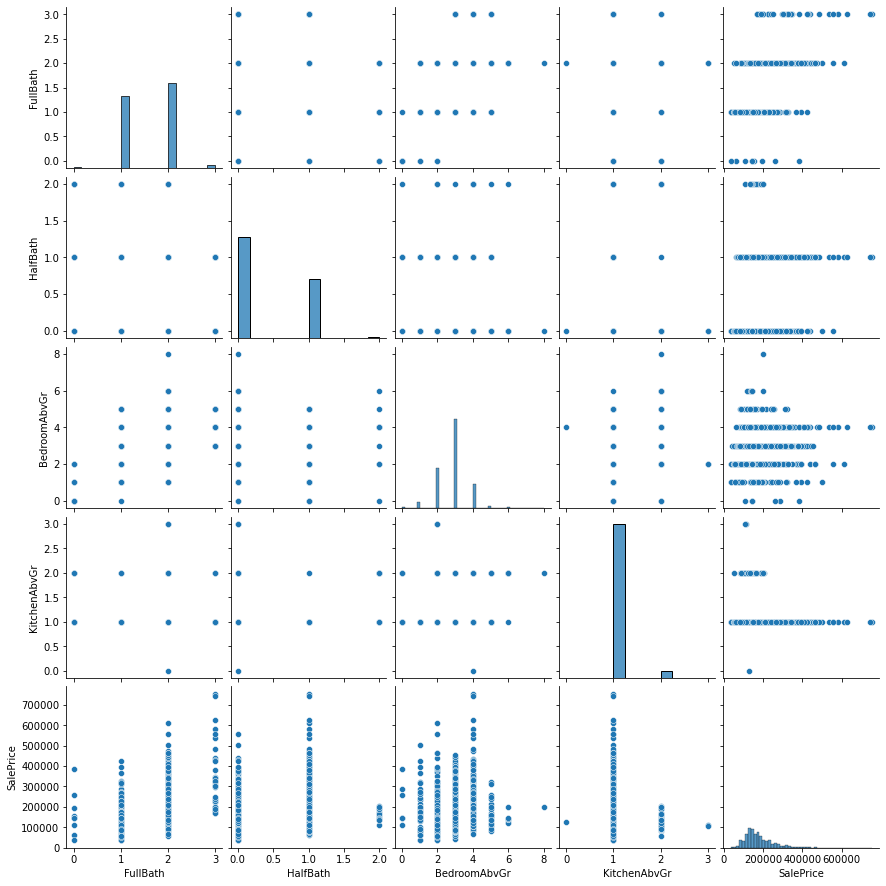

In [86]:
# Visualize the numerical varaibles
num_var = ["FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","SalePrice"]
sns.pairplot(data_numeric[num_var])
plt.show()

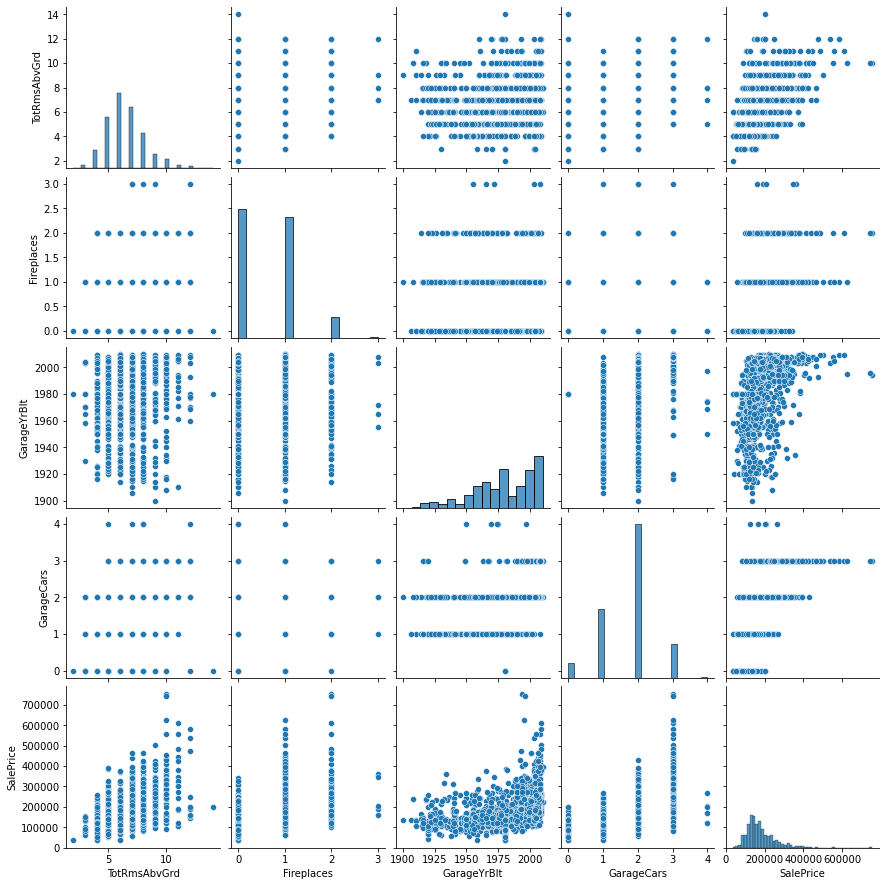

In [87]:
# Visualize the numerical varaibles
num_var = ["TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","SalePrice"]
sns.pairplot(data_numeric[num_var])
plt.show()

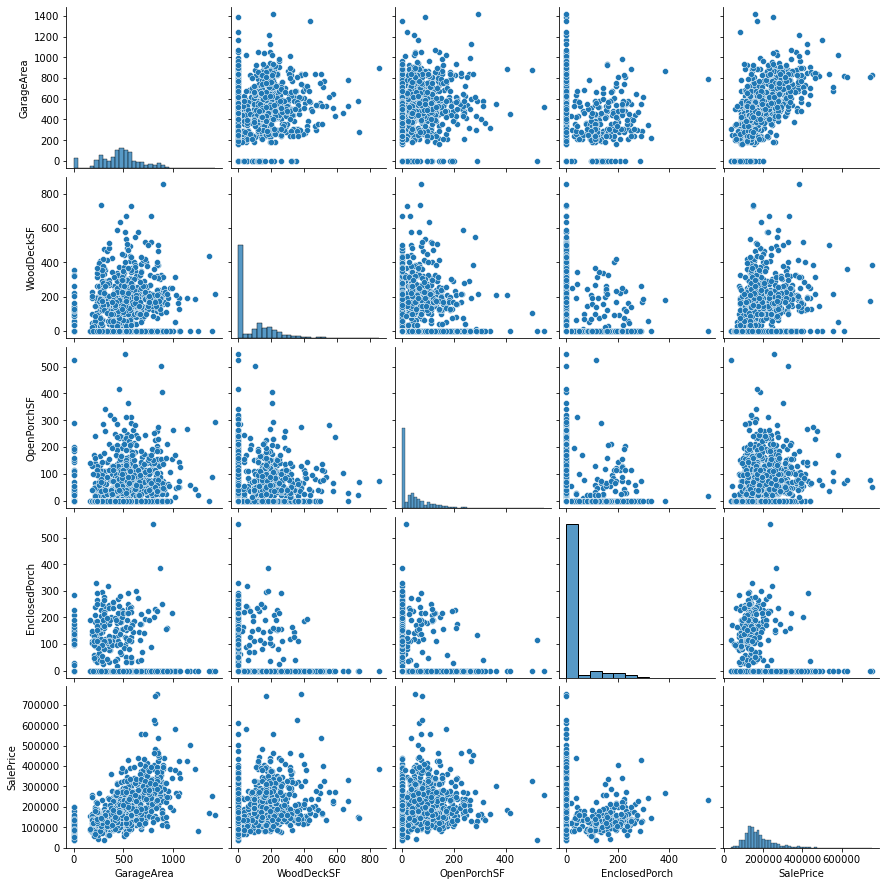

In [88]:
# Visualize the numerical varaibles
num_var = ["GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice"]
sns.pairplot(data_numeric[num_var])
plt.show()

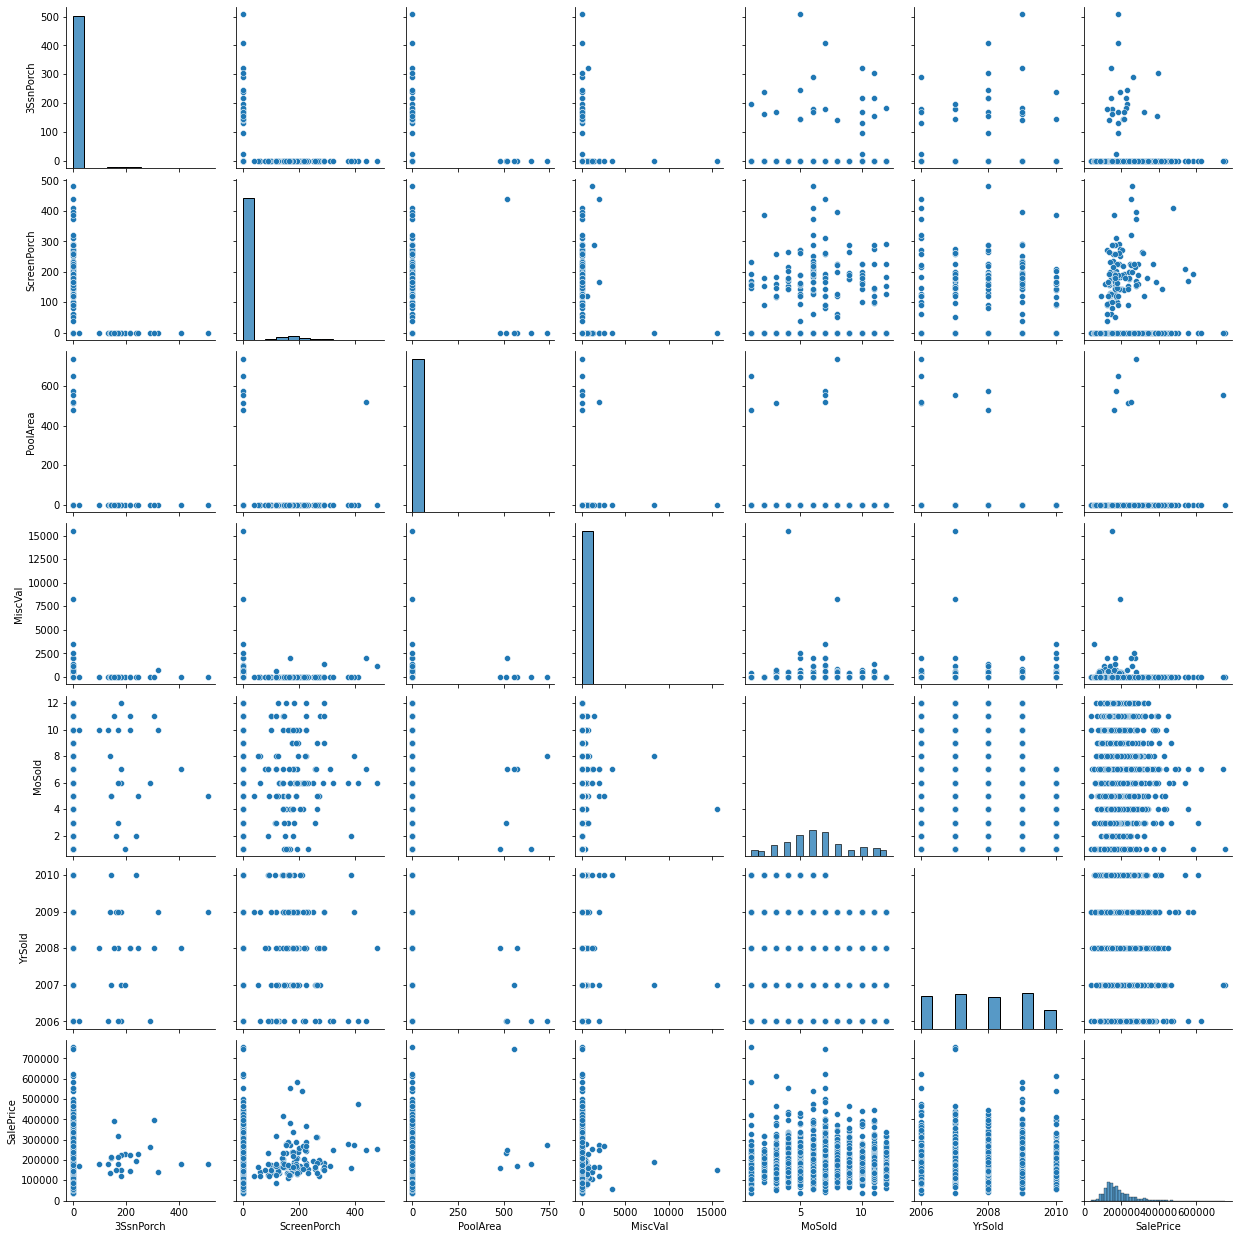

In [89]:
# Visualize the numerical varaibles
num_var = ["3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]
sns.pairplot(data_numeric[num_var])
plt.show()

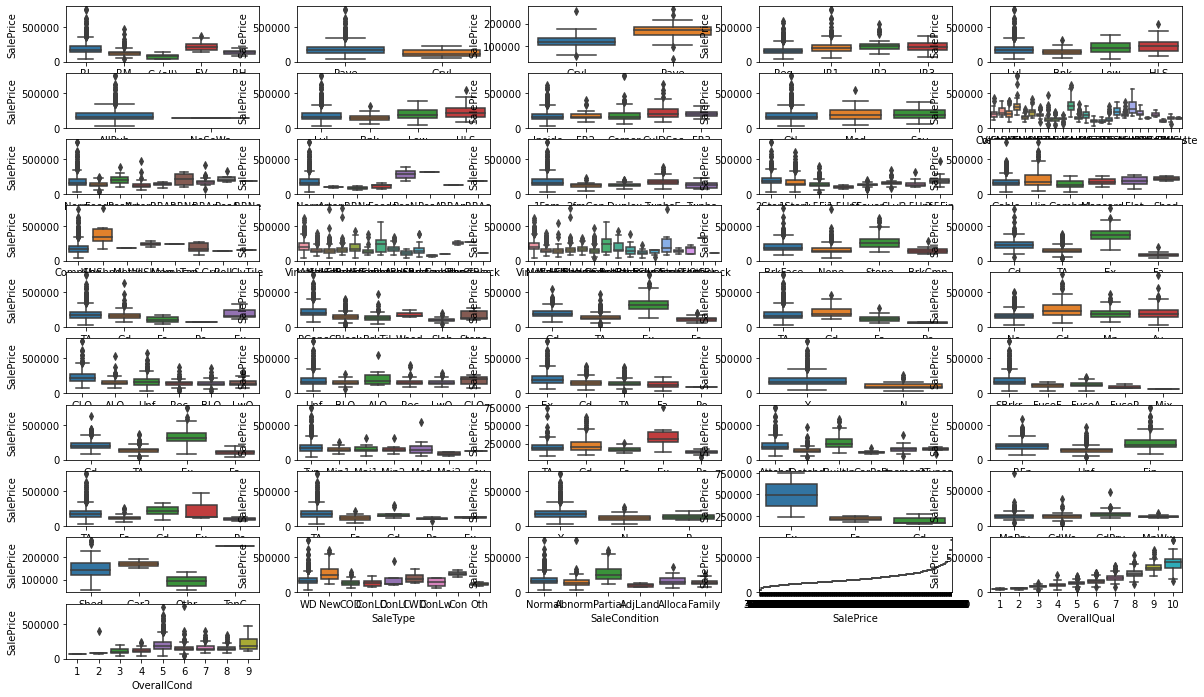

In [90]:
# Visualize the categorical varaibles
plt.figure(figsize=(20,12))
plt.subplot(10,5,1)
sns.boxplot(x= "MSZoning", y = "SalePrice", data = data)
plt.subplot(10,5,2)
sns.boxplot(x= "Street", y = "SalePrice", data = data)
plt.subplot(10,5,3)
sns.boxplot(x= "Alley", y = "SalePrice", data = data)
plt.subplot(10,5,4)
sns.boxplot(x= "LotShape", y = "SalePrice", data = data)
plt.subplot(10,5,5)
sns.boxplot(x= "LandContour", y = "SalePrice", data = data)
plt.subplot(10,5,6)
sns.boxplot(x= "Utilities", y = "SalePrice", data = data)
plt.subplot(10,5,7)
sns.boxplot(x= "LandContour", y = "SalePrice", data = data)
plt.subplot(10,5,8)
sns.boxplot(x= "LotConfig", y = "SalePrice", data = data)
plt.subplot(10,5,9)
sns.boxplot(x= "LandSlope", y = "SalePrice", data = data)
plt.subplot(10,5,10)
sns.boxplot(x= "Neighborhood", y = "SalePrice", data = data)
plt.subplot(10,5,11)
sns.boxplot(x= "Condition1", y = "SalePrice", data = data)
plt.subplot(10,5,12)
sns.boxplot(x= "Condition2", y = "SalePrice", data = data)
plt.subplot(10,5,13)
sns.boxplot(x= "BldgType", y = "SalePrice", data = data)
plt.subplot(10,5,14)
sns.boxplot(x= "HouseStyle", y = "SalePrice", data = data)
plt.subplot(10,5,15)
sns.boxplot(x= "RoofStyle", y = "SalePrice", data = data)
plt.subplot(10,5,16)
sns.boxplot(x= "RoofMatl", y = "SalePrice", data = data)
plt.subplot(10,5,17)
sns.boxplot(x= "Exterior1st", y = "SalePrice", data = data)
plt.subplot(10,5,18)
sns.boxplot(x= "Exterior2nd", y = "SalePrice", data = data)
plt.subplot(10,5,19)
sns.boxplot(x= "MasVnrType", y = "SalePrice", data = data)
plt.subplot(10,5,20)
sns.boxplot(x= "ExterQual", y = "SalePrice", data = data)
plt.subplot(10,5,21)
sns.boxplot(x= "ExterCond", y = "SalePrice", data = data)
plt.subplot(10,5,22)
sns.boxplot(x= "Foundation", y = "SalePrice", data = data)
plt.subplot(10,5,23)
sns.boxplot(x= "BsmtQual", y = "SalePrice", data = data)
plt.subplot(10,5,24)
sns.boxplot(x= "BsmtCond", y = "SalePrice", data = data)
plt.subplot(10,5,25)
sns.boxplot(x= "BsmtExposure", y = "SalePrice", data = data)
plt.subplot(10,5,26)
sns.boxplot(x= "BsmtFinType1", y = "SalePrice", data = data)
plt.subplot(10,5,27)
sns.boxplot(x= "BsmtFinType2", y = "SalePrice", data = data)
plt.subplot(10,5,28)
sns.boxplot(x= "HeatingQC", y = "SalePrice", data = data)
plt.subplot(10,5,29)
sns.boxplot(x= "CentralAir", y = "SalePrice", data = data)
plt.subplot(10,5,30)
sns.boxplot(x= "Electrical", y = "SalePrice", data = data)
plt.subplot(10,5,31)
sns.boxplot(x= "KitchenQual", y = "SalePrice", data = data)
plt.subplot(10,5,32)
sns.boxplot(x= "Functional", y = "SalePrice", data = data)
plt.subplot(10,5,33)
sns.boxplot(x= "FireplaceQu", y = "SalePrice", data = data)
plt.subplot(10,5,34)
sns.boxplot(x= "GarageType", y = "SalePrice", data = data)
plt.subplot(10,5,35)
sns.boxplot(x= "GarageFinish", y = "SalePrice", data = data)
plt.subplot(10,5,36)
sns.boxplot(x= "GarageQual", y = "SalePrice", data = data)
plt.subplot(10,5,37)
sns.boxplot(x= "GarageCond", y = "SalePrice", data = data)
plt.subplot(10,5,38)
sns.boxplot(x= "PavedDrive", y = "SalePrice", data = data)
plt.subplot(10,5,39)
sns.boxplot(x= "PoolQC", y = "SalePrice", data = data)
plt.subplot(10,5,40)
sns.boxplot(x= "Fence", y = "SalePrice", data = data)
plt.subplot(10,5,41)
sns.boxplot(x= "MiscFeature", y = "SalePrice", data = data)
plt.subplot(10,5,42)
sns.boxplot(x= "SaleType", y = "SalePrice", data = data)
plt.subplot(10,5,43)
sns.boxplot(x= "SaleCondition", y = "SalePrice", data = data)
plt.subplot(10,5,44)
sns.boxplot(x= "SalePrice", y = "SalePrice", data = data)
plt.subplot(10,5,45)
sns.boxplot(x= "OverallQual", y = "SalePrice", data = data)
plt.subplot(10,5,46)
sns.boxplot(x= "OverallCond", y = "SalePrice", data = data)

plt.show()

### Data Preparation

In [91]:
#Creating dummy variables for categorical variables (MSZoning)
status =pd.get_dummies(data['MSZoning'])
status.rename(columns={1: "A",2:"C",3:"FV",4:"I",5:"RH",6:"RL",7:"RP",8:"RM"}, inplace=True)
status

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [92]:
data = pd.concat([data,status],axis=1)
data = data.drop("MSZoning",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,C (all),FV,RH,RL,RM
0,60,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0,0,0,1,0
1,20,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0,0,0,1,0
2,60,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,0,0,0,1,0
3,70,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,0,0,0,1,0
4,60,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0,0,0,1,0


In [93]:
#Creating dummy variables for categorical variables (Street)
status1 =pd.get_dummies(data['Street'])
status1.rename(columns={1: "Grvl",2:"Pave"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Street",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,C (all),FV,RH,RL,RM,C (all),FV,RH,RL,RM
0,60,65,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,1,0,0,0,0,1,0
4,60,84,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,1,0,0,0,0,1,0


In [94]:
#Creating dummy variables for categorical variables (Alley)
status2 =pd.get_dummies(data['Alley'])
status2.rename(columns={1: "Grvl",2:"Pave",3:"NAN"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Alley",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,C (all),FV,RH,RL,RM,C (all),FV,RH,RL,RM
0,60,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,1,0,0,0,0,1,0
4,60,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,1,0,0,0,0,1,0


In [95]:
#Creating dummy variables for categorical variables (LotShape)
status =pd.get_dummies(data['LotShape'])
status.rename(columns={1: "Reg",2:"IR1",3:"IR2",4:"IR3"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("LotShape",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,RM,C (all),FV,RH,RL,RM,IR1,IR2,IR3,Reg
0,60,65,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,1,0,0,0,0,1
1,20,80,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,0,0,1,0,0,0,0,1
2,60,68,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,1,0,1,0,0,0
3,70,60,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,0,0,1,0,1,0,0,0
4,60,84,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,0,0,1,0,1,0,0,0


In [96]:
#Creating dummy variables for categorical variables (LandContour)
status =pd.get_dummies(data['LandContour'])
status.rename(columns={1: "Lvl",2:"Bnk",3:"HLS",4:"Low"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("LandContour",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,RL,RM,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl
0,60,65,8450,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,1,0,0,0,0,1,0,0,0,1
1,20,80,9600,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,1,0,0,0,0,1,0,0,0,1
2,60,68,11250,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,1,0,1,0,0,0,0,0,0,1
3,70,60,9550,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,1,0,1,0,0,0,0,0,0,1
4,60,84,14260,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,1,0,1,0,0,0,0,0,0,1


In [97]:
#Creating dummy variables for categorical variables (Utilities)
status =pd.get_dummies(data['Utilities'])
status.rename(columns={1: "AllPub",2:"NoSewr",3:"NoSeWa",4:"ELO"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Utilities",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,AllPub,NoSeWa
0,60,65,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,0,0,1,0,0,0,1,1,0
1,20,80,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,0,0,0,1,0,0,0,1,1,0
2,60,68,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,1,0,0,0,0,0,0,1,1,0
3,70,60,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,1,0,0,0,0,0,0,1,1,0
4,60,84,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,1,0,0,0,0,0,0,1,1,0


In [98]:
#Creating dummy variables for categorical variables (LotConfig)
status =pd.get_dummies(data['LotConfig'])
status.rename(columns={1: "Inside",2:"Corner",3:"CulDSac",4:"FR2",5:"FR3"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("LotConfig",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,HLS,Low,Lvl,AllPub,NoSeWa,Corner,CulDSac,FR2,FR3,Inside
0,60,65,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,1,1,0,0,0,0,0,1
1,20,80,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,1,1,0,0,0,1,0,0
2,60,68,11250,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,1,1,0,0,0,0,0,1
3,70,60,9550,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,0,0,1,1,0,1,0,0,0,0
4,60,84,14260,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,0,0,1,1,0,0,0,1,0,0


In [99]:
#Creating dummy variables for categorical variables (LandSlope)
status =pd.get_dummies(data['LandSlope'])
status.rename(columns={1: "Gtl",2:"Mod",3:"Sev"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("LandSlope",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,AllPub,NoSeWa,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev
0,60,65,8450,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,1,0,0,0,0,0,1,1,0,0
1,20,80,9600,Veenker,Feedr,Norm,1Fam,1Story,6,8,...,1,0,0,0,1,0,0,1,0,0
2,60,68,11250,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,1,0,0,0,0,0,1,1,0,0
3,70,60,9550,Crawfor,Norm,Norm,1Fam,2Story,7,5,...,1,0,1,0,0,0,0,1,0,0
4,60,84,14260,NoRidge,Norm,Norm,1Fam,2Story,8,5,...,1,0,0,0,1,0,0,1,0,0


In [100]:
#Creating dummy variables for categorical variables (Neighborhood)
status =pd.get_dummies(data['Neighborhood'])
status.rename(columns={1: "Blmngtn",2:"Blueste",3:"BrDale",4:"BrkSide",5:"ClearCr",6:"CollgCr",7:"Crawfor",8:"Edwards",9:"Gilbert",10:"IDOTRR",11:"IDOTRR",12:"MeadowV",13:"Mitchel",14:"Names",15:"NoRidge",16:"NPkVill",17:"NridgHt",18:"NWAmes",19:"OldTown",20:"SWISU",21:"Sawyer",22:"SawyerW",23:"Somerst",24:"StoneBr",25:"Timber",26:"Veenker"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Neighborhood",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,60,65,8450,Norm,Norm,1Fam,2Story,7,5,2003,...,0,0,0,0,0,0,0,0,0,0
1,20,80,9600,Feedr,Norm,1Fam,1Story,6,8,1976,...,0,0,0,0,0,0,0,0,0,1
2,60,68,11250,Norm,Norm,1Fam,2Story,7,5,2001,...,0,0,0,0,0,0,0,0,0,0
3,70,60,9550,Norm,Norm,1Fam,2Story,7,5,1915,...,0,0,0,0,0,0,0,0,0,0
4,60,84,14260,Norm,Norm,1Fam,2Story,8,5,2000,...,1,0,0,0,0,0,0,0,0,0


In [101]:
#Creating dummy variables for categorical variables (Condition1)
status =pd.get_dummies(data['Condition1'])
status.rename(columns={1: "Artery",2:"Feedr",3:"Norm",4:"RRNn",5:"RRAn",6:"PosN",7:"PosA",8:"RRNe",9:"RRAe"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Condition1",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,60,65,8450,Norm,1Fam,2Story,7,5,2003,2003,...,0,0,0,1,0,0,0,0,0,0
1,20,80,9600,Norm,1Fam,1Story,6,8,1976,1976,...,1,0,1,0,0,0,0,0,0,0
2,60,68,11250,Norm,1Fam,2Story,7,5,2001,2002,...,0,0,0,1,0,0,0,0,0,0
3,70,60,9550,Norm,1Fam,2Story,7,5,1915,1970,...,0,0,0,1,0,0,0,0,0,0
4,60,84,14260,Norm,1Fam,2Story,8,5,2000,2000,...,0,0,0,1,0,0,0,0,0,0


In [102]:
#Creating dummy variables for categorical variables (Condition2)
status =pd.get_dummies(data['Condition2'])
status.rename(columns={1: "Artery",2:"Feedr",3:"Norm",4:"RRNn",5:"RRAn",6:"PosN",7:"PosA",8:"RRNe",9:"RRAe"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Condition2",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,RRNe,RRNn,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,60,65,8450,1Fam,2Story,7,5,2003,2003,Gable,...,0,0,0,0,1,0,0,0,0,0
1,20,80,9600,1Fam,1Story,6,8,1976,1976,Gable,...,0,0,0,0,1,0,0,0,0,0
2,60,68,11250,1Fam,2Story,7,5,2001,2002,Gable,...,0,0,0,0,1,0,0,0,0,0
3,70,60,9550,1Fam,2Story,7,5,1915,1970,Gable,...,0,0,0,0,1,0,0,0,0,0
4,60,84,14260,1Fam,2Story,8,5,2000,2000,Gable,...,0,0,0,0,1,0,0,0,0,0


In [103]:
#Creating dummy variables for categorical variables (BldgType)
status =pd.get_dummies(data['BldgType'])
status.rename(columns={1: "1Fam",2:"2FmCon"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("BldgType",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,PosA,PosN,RRAe,RRAn,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
0,60,65,8450,2Story,7,5,2003,2003,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0
1,20,80,9600,1Story,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0
2,60,68,11250,2Story,7,5,2001,2002,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0
3,70,60,9550,2Story,7,5,1915,1970,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0
4,60,84,14260,2Story,8,5,2000,2000,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0


In [104]:
#Creating dummy variables for categorical variables (HouseStyle)
status =pd.get_dummies(data['HouseStyle'])
status.rename(columns={1: "1Story",2:"1.5Fin",3:"1.5Unf",4:"2Story",5:"2.5Fin",6:"2.5Unf",7:"SFoyer",8:"SLvl"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("HouseStyle",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,60,65,8450,7,5,2003,2003,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,20,80,9600,6,8,1976,1976,Gable,CompShg,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,68,11250,7,5,2001,2002,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,70,60,9550,7,5,1915,1970,Gable,CompShg,Wd Sdng,...,0,0,0,0,0,0,0,1,0,0
4,60,84,14260,8,5,2000,2000,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,1,0,0


In [105]:
#Creating dummy variables for categorical variables (RoofStyle)
status =pd.get_dummies(data['RoofStyle'])
status.rename(columns={1: "Flat",2:"Gable",3:"Gambrel",4:"Hip",5:"Mansard",6:"Shed"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("RoofStyle",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,...,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed
0,60,65,8450,7,5,2003,2003,CompShg,VinylSd,VinylSd,...,0,1,0,0,0,1,0,0,0,0
1,20,80,9600,6,8,1976,1976,CompShg,MetalSd,MetalSd,...,0,0,0,0,0,1,0,0,0,0
2,60,68,11250,7,5,2001,2002,CompShg,VinylSd,VinylSd,...,0,1,0,0,0,1,0,0,0,0
3,70,60,9550,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,...,0,1,0,0,0,1,0,0,0,0
4,60,84,14260,8,5,2000,2000,CompShg,VinylSd,VinylSd,...,0,1,0,0,0,1,0,0,0,0


In [106]:
#Creating dummy variables for categorical variables (RoofMatl)
status =pd.get_dummies(data['RoofMatl'])
status.rename(columns={1: "ClyTile",2:"CompShg",3:"Membran",4:"Metal",5:"Roll",6:"Tar&Grv",7:"WdShake",8:"WdShngl"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("RoofMatl",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,...,Mansard,Shed,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
0,60,65,8450,7,5,2003,2003,VinylSd,VinylSd,BrkFace,...,0,0,0,1,0,0,0,0,0,0
1,20,80,9600,6,8,1976,1976,MetalSd,MetalSd,None,...,0,0,0,1,0,0,0,0,0,0
2,60,68,11250,7,5,2001,2002,VinylSd,VinylSd,BrkFace,...,0,0,0,1,0,0,0,0,0,0
3,70,60,9550,7,5,1915,1970,Wd Sdng,Wd Shng,None,...,0,0,0,1,0,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,VinylSd,VinylSd,BrkFace,...,0,0,0,1,0,0,0,0,0,0


In [107]:
#Creating dummy variables for categorical variables (Exterior1st)
status =pd.get_dummies(data['Exterior1st'])
status.rename(columns={1: "AsbShng",2:"AsphShn",3:"BrkComm",4:"BrkFace",5:"CBlock",6:"CemntBd",7:"HdBoard",8:"ImStucc",9:"MetalSd",10:"Other",11:"Plywood",12:"PreCast",13:"Stone",14:"Stucco",15:"VinylSd",16:"Wd Sdng",17:"WdShing"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Exterior1st",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrType,MasVnrArea,...,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,60,65,8450,7,5,2003,2003,VinylSd,BrkFace,196,...,0,0,0,0,0,0,0,1,0,0
1,20,80,9600,6,8,1976,1976,MetalSd,None,0,...,0,0,0,1,0,0,0,0,0,0
2,60,68,11250,7,5,2001,2002,VinylSd,BrkFace,162,...,0,0,0,0,0,0,0,1,0,0
3,70,60,9550,7,5,1915,1970,Wd Shng,None,0,...,0,0,0,0,0,0,0,0,1,0
4,60,84,14260,8,5,2000,2000,VinylSd,BrkFace,350,...,0,0,0,0,0,0,0,1,0,0


In [108]:
#Creating dummy variables for categorical variables (Exterior2nd)
status =pd.get_dummies(data['Exterior2nd'])
status.rename(columns={1: "AsbShng",2:"AsphShn",3:"BrkComm",4:"BrkFace",5:"CBlock",6:"CemntBd",7:"HdBoard",8:"ImStucc",9:"MetalSd",10:"Other",11:"Plywood",12:"PreCast",13:"Stone",14:"Stucco",15:"VinylSd",16:"Wd Sdng",17:"WdShing"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Exterior2nd",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,...,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
0,60,65,8450,7,5,2003,2003,BrkFace,196,Gd,...,0,0,0,0,0,0,0,1,0,0
1,20,80,9600,6,8,1976,1976,None,0,TA,...,0,0,1,0,0,0,0,0,0,0
2,60,68,11250,7,5,2001,2002,BrkFace,162,Gd,...,0,0,0,0,0,0,0,1,0,0
3,70,60,9550,7,5,1915,1970,None,0,TA,...,0,0,0,0,0,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,BrkFace,350,Gd,...,0,0,0,0,0,0,0,1,0,0


In [109]:
#Creating dummy variables for categorical variables (MasVnrType)
status =pd.get_dummies(data['MasVnrType'])
status.rename(columns={1: "BrkCmn",2:"BrkFace",3:"CBlock",4:"None",5:"Stone"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("MasVnrType",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone
0,60,65,8450,7,5,2003,2003,196,Gd,TA,...,0,0,0,1,0,0,0,1,0,0
1,20,80,9600,6,8,1976,1976,0,TA,TA,...,0,0,0,0,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,Gd,TA,...,0,0,0,1,0,0,0,1,0,0
3,70,60,9550,7,5,1915,1970,0,TA,TA,...,0,0,0,0,0,1,0,0,1,0
4,60,84,14260,8,5,2000,2000,350,Gd,TA,...,0,0,0,1,0,0,0,1,0,0


In [110]:
#Creating dummy variables for categorical variables (ExterQual)
status =pd.get_dummies(data['ExterQual'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("ExterQual",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,Foundation,...,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone,Ex,Fa,Gd,TA
0,60,65,8450,7,5,2003,2003,196,TA,PConc,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,TA,CBlock,...,0,0,0,0,1,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,TA,PConc,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,TA,BrkTil,...,0,1,0,0,1,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,TA,PConc,...,0,0,0,1,0,0,0,0,1,0


In [111]:
#Creating dummy variables for categorical variables (ExterCond)
status =pd.get_dummies(data['ExterCond'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("ExterCond",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,BsmtQual,...,Stone,Ex,Fa,Gd,TA,Ex,Fa,Gd,Po,TA
0,60,65,8450,7,5,2003,2003,196,PConc,Gd,...,0,0,0,1,0,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,CBlock,Gd,...,0,0,0,0,1,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,PConc,Gd,...,0,0,0,1,0,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,BrkTil,TA,...,0,0,0,0,1,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,PConc,Gd,...,0,0,0,1,0,0,0,0,0,1


In [112]:
#Creating dummy variables for categorical variables (Foundation)
status =pd.get_dummies(data['Foundation'])
status.rename(columns={1: "BrkTil",2:"CBlock",3:"PConc",4:"Slab",5:"Stone",6:"Wood"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Foundation",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,...,Fa,Gd,Po,TA,BrkTil,CBlock,PConc,Slab,Stone,Wood
0,60,65,8450,7,5,2003,2003,196,Gd,TA,...,0,0,0,1,0,0,1,0,0,0
1,20,80,9600,6,8,1976,1976,0,Gd,TA,...,0,0,0,1,0,1,0,0,0,0
2,60,68,11250,7,5,2001,2002,162,Gd,TA,...,0,0,0,1,0,0,1,0,0,0
3,70,60,9550,7,5,1915,1970,0,TA,Gd,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,Gd,TA,...,0,0,0,1,0,0,1,0,0,0


In [113]:
#Creating dummy variables for categorical variables (BsmtQual)
status =pd.get_dummies(data['BsmtQual'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po",6:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("BsmtQual",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtCond,BsmtExposure,...,BrkTil,CBlock,PConc,Slab,Stone,Wood,Ex,Fa,Gd,TA
0,60,65,8450,7,5,2003,2003,196,TA,No,...,0,0,1,0,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,TA,Gd,...,0,1,0,0,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,TA,Mn,...,0,0,1,0,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,Gd,No,...,1,0,0,0,0,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,TA,Av,...,0,0,1,0,0,0,0,0,1,0


In [114]:
#Creating dummy variables for categorical variables (BsmtCond)
status =pd.get_dummies(data['BsmtCond'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po",6:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("BsmtCond",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinType1,...,Stone,Wood,Ex,Fa,Gd,TA,Fa,Gd,Po,TA
0,60,65,8450,7,5,2003,2003,196,No,GLQ,...,0,0,0,0,1,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,Gd,ALQ,...,0,0,0,0,1,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,Mn,GLQ,...,0,0,0,0,1,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,No,ALQ,...,0,0,0,0,0,1,0,1,0,0
4,60,84,14260,8,5,2000,2000,350,Av,GLQ,...,0,0,0,0,1,0,0,0,0,1


In [115]:
#Creating dummy variables for categorical variables (BsmtExposure)
status =pd.get_dummies(data['BsmtExposure'])
status.rename(columns={1: "Gd",2:"Av",3:"Mn",4:"No",5:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("BsmtExposure",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinType1,BsmtFinSF1,...,Gd,TA,Fa,Gd,Po,TA,Av,Gd,Mn,No
0,60,65,8450,7,5,2003,2003,196,GLQ,706,...,1,0,0,0,0,1,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,ALQ,978,...,1,0,0,0,0,1,0,1,0,0
2,60,68,11250,7,5,2001,2002,162,GLQ,486,...,1,0,0,0,0,1,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,ALQ,216,...,0,1,0,1,0,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,GLQ,655,...,1,0,0,0,0,1,1,0,0,0


In [116]:
#Creating dummy variables for categorical variables (BsmtFinType1)
status =pd.get_dummies(data['BsmtFinType1'])
status.rename(columns={1: "GLQ",2:"ALQ",3:"BLQ",4:"Rec",5:"LwQ",6:"Unf",7:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("BsmtFinType1",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinType2,...,Av,Gd,Mn,No,ALQ,BLQ,GLQ,LwQ,Rec,Unf
0,60,65,8450,7,5,2003,2003,196,706,Unf,...,0,0,0,1,0,0,1,0,0,0
1,20,80,9600,6,8,1976,1976,0,978,Unf,...,0,1,0,0,1,0,0,0,0,0
2,60,68,11250,7,5,2001,2002,162,486,Unf,...,0,0,1,0,0,0,1,0,0,0
3,70,60,9550,7,5,1915,1970,0,216,Unf,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,Unf,...,1,0,0,0,0,0,1,0,0,0


In [117]:
#Creating dummy variables for categorical variables (BsmtFinType2)
status =pd.get_dummies(data['BsmtFinType2'])
status.rename(columns={1: "GLQ",2:"ALQ",3:"BLQ",4:"Rec",5:"LwQ",6:"Unf",7:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("BsmtFinType2",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf
0,60,65,8450,7,5,2003,2003,196,706,0,...,1,0,0,0,0,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,0,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,1,0,0,0,0,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,0,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,1,0,0,0,0,0,0,0,0,1


In [118]:
#Creating dummy variables for categorical variables (Heating)
status =pd.get_dummies(data['Heating'])
status.rename(columns={1: "Floor",2:"GasA",3:"GasW",4:"Grav",5:"OthW",6:"Wall"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Heating",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GLQ,LwQ,Rec,Unf,Floor,GasA,GasW,Grav,OthW,Wall
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,1,0,0,0,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,1,0,0,0,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,1,0,0,0,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,0,1,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,1,0,0,0,0


In [119]:
#Creating dummy variables for categorical variables (HeatingQC)
status =pd.get_dummies(data['HeatingQC'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("HeatingQC",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GasA,GasW,Grav,OthW,Wall,Ex,Fa,Gd,Po,TA
0,60,65,8450,7,5,2003,2003,196,706,0,...,1,0,0,0,0,1,0,0,0,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,1,0,0,0,0,1,0,0,0,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,1,0,0,0,0,1,0,0,0,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,1,0,0,0,0,0,0,1,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,1,0,0,0,0,1,0,0,0,0


In [120]:
#Creating dummy variables for categorical variables (CentralAir)
status =pd.get_dummies(data['CentralAir'])
status.rename(columns={1: "N",2:"Y"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("CentralAir",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Grav,OthW,Wall,Ex,Fa,Gd,Po,TA,N,Y
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,0,1,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,0,1


In [121]:
#Creating dummy variables for categorical variables (Electrical)
status =pd.get_dummies(data['Electrical'])
status.rename(columns={1: "SBrkr",2:"FuseA",3:"FuseF",4:"FuseP",5:"Mix"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Electrical",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Gd,Po,TA,N,Y,FuseA,FuseF,FuseP,Mix,SBrkr
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,1,0,0,0,1,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,1,0,0,0,0,1


In [122]:
#Creating dummy variables for categorical variables (KitchenQual)
status =pd.get_dummies(data['KitchenQual'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("KitchenQual",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Y,FuseA,FuseF,FuseP,Mix,SBrkr,Ex,Fa,Gd,TA
0,60,65,8450,7,5,2003,2003,196,706,0,...,1,0,0,0,0,1,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,1,0,0,0,0,1,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,1,0,0,0,0,1,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,1,0,0,0,0,1,0,0,1,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,1,0,0,0,0,1,0,0,1,0


In [123]:
#Creating dummy variables for categorical variables (Functional)
status =pd.get_dummies(data['Functional'])
status.rename(columns={1: "Typ",2:"Min1",3:"Min2",4:"Mod",5:"Maj1",6:"Maj2",7:"Sev",8:"Sal"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Functional",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,TA,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,1,0,0,0,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,1,0,0,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,1,0,0,0,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,1,0,0,0,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,1,0,0,0,0,0,0,0,1


In [124]:
#Creating dummy variables for categorical variables (FireplaceQu)
status =pd.get_dummies(data['FireplaceQu'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po",6:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("FireplaceQu",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Mod,Sev,Typ,Ex,Fa,Gd,Po,TA
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,1,0,0,0,0,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,1,0,0,1,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,1,0,0,0,0,1


In [125]:
#Creating dummy variables for categorical variables (GarageType)
status =pd.get_dummies(data['GarageType'])
status.rename(columns={1: "2Types",2:"Attchd",3:"Basment",4:"BuiltIn",5:"CarPort",6:"Detchd",7:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("GarageType",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,0,1,0,0,0,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,1,0,0,0,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,1,0,0,0,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,1,0,0,0,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,1,0,0,0,0


In [126]:
#Creating dummy variables for categorical variables (GarageFinish)
status =pd.get_dummies(data['GarageFinish'])
status.rename(columns={1: "Fin",2:"RFn",3:"Unf",4:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("GarageFinish",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TA,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,1,0,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,1,0,1,0,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,1,0,1,0,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,0,0,1,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,1,0,1,0,0,0,0,0,1,0


In [127]:
#Creating dummy variables for categorical variables (GarageQual)
status =pd.get_dummies(data['GarageQual'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po",6:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("GarageQual",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,CarPort,Detchd,Fin,RFn,Unf,Ex,Fa,Gd,Po,TA
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,1,0,0,1,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,0,1


In [128]:
#Creating dummy variables for categorical variables (GarageCond)
status =pd.get_dummies(data['GarageCond'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"Po",6:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("GarageCond",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Ex,Fa,Gd,Po,TA,Ex,Fa,Gd,Po,TA
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,1,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,1,0,0,0,0,1


In [129]:
#Creating dummy variables for categorical variables (PavedDrive)
status =pd.get_dummies(data['PavedDrive'])
status.rename(columns={1: "Y",2:"P",3:"N"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("PavedDrive",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Po,TA,Ex,Fa,Gd,Po,TA,N,P,Y
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,1,0,0,0,0,1,0,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,1,0,0,0,0,1,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,1,0,0,0,0,1,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,1,0,0,0,0,1,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,1,0,0,0,0,1,0,0,1


In [130]:
#Creating dummy variables for categorical variables (PoolQC)
status =pd.get_dummies(data['PoolQC'])
status.rename(columns={1: "Ex",2:"Gd",3:"TA",4:"Fa",5:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("PoolQC",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,N,P,Y,Ex,Fa,Gd
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,1,0,0,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,1,0,0,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,1,0,0,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,0,0,1,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,1,0,0,0


In [131]:
#Creating dummy variables for categorical variables (Fence)
status =pd.get_dummies(data['Fence'])
status.rename(columns={1: "GdPrv",2:"MnPrv",3:"GdWo",4:"MnWw",5:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("Fence",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,N,P,Y,Ex,Fa,Gd,GdPrv,GdWo,MnPrv,MnWw
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,1,0,0,0,0,0,0,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,1,0,0,0,0,0,0,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,1,0,0,0,0,0,0,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,1,0,0,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,1,0,0,0,0,0,0,0


In [132]:
#Creating dummy variables for categorical variables (MiscFeature)
status =pd.get_dummies(data['MiscFeature'])
status.rename(columns={1: "Elev",2:"Gar2",3:"Othr",4:"Shed",5:"TenC",6:"NA"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("MiscFeature",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,GdPrv,GdWo,MnPrv,MnWw,Gar2,Othr,Shed,TenC
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,0,0,0,0,0,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,0,0,0,0,0,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,0,0,0,0,0,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,0,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
#Creating dummy variables for categorical variables (SaleType)
status =pd.get_dummies(data['SaleType'])
status.rename(columns={1: "WD",2:"CWD",3:"VWD",4:"New",5:"COD",6:"Con",7:"ConLw",8:"ConLI",9:"ConLD",10:"Oth"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("SaleType",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TenC,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,0,0,0,0,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,0,0,0,0,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,0,0,0,0,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,0,0,0,0,0,1
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
#Creating dummy variables for categorical variables (SaleCondition)
status =pd.get_dummies(data['SaleCondition'])
status.rename(columns={1: "Normal",2:"Abnorml",3:"AdjLand",4:"Alloca",5:"Family",6:"Partial"}, inplace=True)
data = pd.concat([data,status],axis=1)
data = data.drop("SaleCondition",axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,1,0


In [135]:
#Scalling numerical data
scaler = MinMaxScaler()
num_vars = ["MSSubClass","LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","SalePrice"]
data[num_vars] = scaler.fit_transform(data[num_vars])
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0.235294,0.150685,0.033420,7,5,0.949275,0.883333,0.12250,0.125089,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.202055,0.038795,6,8,0.753623,0.433333,0.00000,0.173281,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0.235294,0.160959,0.046507,7,5,0.934783,0.866667,0.10125,0.086109,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0.294118,0.133562,0.038561,7,5,0.311594,0.333333,0.00000,0.038271,0.0,...,0,0,0,1,1,0,0,0,0,0
4,0.235294,0.215753,0.060576,8,5,0.927536,0.833333,0.21875,0.116052,0.0,...,0,0,0,1,0,0,0,0,1,0


### Splitting the data

In [136]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.167949,0.043080,6.099315,5.575342,0.719332,0.581096,0.064801,0.078604,0.031580,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.248827,0.075425,0.046653,1.382997,1.112799,0.218862,0.344090,0.112856,0.080811,0.109443,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.029229,5.000000,5.000000,0.594203,0.283333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.167808,0.038227,6.000000,5.000000,0.731884,0.733333,0.000000,0.067948,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.198630,0.048150,7.000000,6.000000,0.927536,0.900000,0.102656,0.126196,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,10.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
y= data.pop("SalePrice")
X= data

In [138]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        train_size=0.7,
                                                        test_size = 0.3, random_state=100)

In [140]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [141]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

1.895388020163194
[-6.09386322e-03  4.24919987e-02  1.98929988e-01  9.16582887e-03
  7.16185692e-03  7.07763575e-02  1.25159105e-02  5.14892640e-02
  1.71693952e-01  3.18926440e-02  1.88266874e-02  1.73490927e-01
  1.75041051e-01  1.46166028e-01  4.24819546e-03  2.01034612e-01
  8.60761997e-03  8.63339975e-04  2.60419743e-03 -8.21632413e-03
 -4.04071835e-02 -5.93701931e-02 -6.58301916e-03  8.88588578e-03
  8.93538547e-06  2.01107091e-02  2.52984964e-02  1.25741865e-02
  1.68983137e-02  1.02987255e-02  1.36576563e-02  1.00267387e-02
  6.20418688e+00  1.96451999e-01 -4.08791559e-03 -1.20012892e-03
 -9.32547229e-03  2.73028806e-03  3.10057681e-03  3.09790406e-03
  3.96703359e-04 -9.32547229e-03  2.73028806e-03  3.10057681e-03
  3.09790406e-03  3.96703359e-04 -9.32547229e-03  2.73028806e-03
  3.10057681e-03  3.09790406e-03  3.96703359e-04 -1.02888369e-03
 -1.98174666e-03  1.22312248e-03  1.78750787e-03  4.59911476e-04
  3.37841120e-03 -1.00304752e-02  6.19215256e-03  6.98276125e-03
 -6.982

In [142]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9529830743827247
-3.091749597095692
0.5785446077011884
22.242019265422627
0.0005666450614115459
0.050780865902791385


In [173]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [174]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.2}


In [186]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.53129314e-02  1.55075596e-02  1.19283229e-01  1.01759037e-02
  7.25521542e-03  5.45441488e-02  9.25363387e-03  4.89394646e-02
  1.18538359e-01  2.74696804e-02  1.67342427e-02  1.22522422e-01
  1.55644404e-01  1.30448198e-01 -2.66342141e-02  1.75666743e-01
  1.80953159e-02 -4.01338637e-03  1.14677615e-02 -3.27622995e-03
 -2.69460282e-02 -4.08826424e-02  1.06498779e-02  1.64381645e-02
  4.09772119e-05  3.72717805e-02  1.28050445e-02  1.33777902e-02
  1.27357265e-02 -5.85574983e-03  1.89432060e-02  8.76397240e-03
 -2.47286294e-02  1.28837607e-02 -3.57980221e-03 -9.93703105e-04
 -1.03849779e-02  2.66801474e-03  3.03330411e-03  3.28803716e-03
  1.39562191e-03 -1.03849779e-02  2.66801474e-03  3.03330411e-03
  3.28803716e-03  1.39562191e-03 -1.03849779e-02  2.66801474e-03
  3.03330411e-03  3.28803716e-03  1.39562191e-03 -1.54386428e-03
 -3.70165874e-04  1.37503963e-03  5.38990533e-04 -6.46166872e-03
  4.11932814e-03 -3.72039384e-03  6.06273442e-03  1.21131590e-02
 -1.21131590e-02 -2.91028

In [187]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9464125370816682
0.7885281476164314
0.6593952561712589
1.1495231815134808
0.0006458327680423692
0.002624482149574157


In [188]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [190]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [191]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9341956533245187
0.8485714349252751
0.8097243584640319
0.8231386065554895
0.0007930698907581116
0.0018793118871129899


In [192]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.952983,0.946413,0.934196
1,R2 Score (Test),-3.091750,0.788528,0.848571
2,RSS (Train),0.578545,0.659395,0.809724
3,RSS (Test),22.242019,1.149523,0.823139
4,MSE (Train),0.023804,0.025413,0.028161
5,MSE (Test),0.225346,0.051230,0.043351


In [182]:
betas = pd.DataFrame(index=X.columns)

In [183]:
betas.rows = X.columns

In [184]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [185]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-0.006094,-0.016980,-0.006796
LotFrontage,0.042492,0.006000,0.000000
LotArea,0.198930,0.093011,0.007160
OverallQual,0.009166,0.010878,0.016017
OverallCond,0.007162,0.006823,0.006558
YearBuilt,0.070776,0.042744,0.006949
YearRemodAdd,0.012516,0.009015,0.005221
MasVnrArea,0.051489,0.047399,0.023631
BsmtFinSF1,0.171694,0.090233,0.000000
BsmtFinSF2,0.031893,0.023839,0.000000
